<center><h1 style="font-size:2em;color:#2467C0"> Datos del INEGI - Proyecto  </h1></center>
<br>
<table>
<col width="550">
<col width="450">
<tr>
<td><img src="figuras/inegi.png" align="middle" style="width:500"/></td>
<td>
    
El **INEGI** es un organismo público autónomo responsable de normar y coordinar el Sistema Nacional de Información Estadística y Geográfica, así como de captar y difundir información de México en cuanto al territorio, los recursos, la población y economía, que permita dar a conocer las características de nuestro país y ayudar a la toma de decisiones.
    
</td>
</tr>
</table>

# API del Banco de indicadores

La API de Indicadores del INEGI permite consultar los datos y metadatos de los indicadores disponibles a nivel nacional, por entidad federativa y municipio. Puede utilizar la API para crear aplicaciones que muestren la información directamente de las bases de datos del INEGI en el preciso momento en que se actualiza.
[[1]](https://www.inegi.org.mx/servicios/api_indicadores.html) 

<img src="figuras/Inegi_token.jpg" align="middle" style="width:1000px"/>


## Consultas INEGI

A continuación se mostrarán cuatro gráficas y un mapa con información obtenida del INEGI con el método mencionado anteriormente.

Importamos las librerías

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import numpy as np
import pandas as pd
import requests
import json

### Analfabetismo en México

El URL siguiente corresponde a la información del *porcentaje total de analfabetas en México de forma histórica*.

In [3]:
url = 'https://www.inegi.org.mx/app/api/indicadores/desarrolladores/jsonxml/INDICATOR/3108001001/es/0700/false/BISE/2.0/2df7d990-4bbc-c1bd-f33e-2da2413413df?type=json'
respuesta = requests.get(url)
if respuesta.status_code == 200:
    contenido = json.loads(respuesta.content)

contenido

{'Header': {'Name': 'Datos compactos BISE',
  'Email': 'atencion.usuarios@inegi.org.mx'},
 'Series': [{'INDICADOR': '3108001001',
   'FREQ': '7',
   'TOPIC': '15',
   'UNIT': '3',
   'UNIT_MULT': '',
   'NOTE': '174',
   'SOURCE': '1714,20118',
   'LASTUPDATE': '03/04/2018 12:00:00 a. m.',
   'STATUS': None,
   'OBSERVATIONS': [{'TIME_PERIOD': '1970',
     'OBS_VALUE': '25.81000000000000000000',
     'OBS_EXCEPTION': None,
     'OBS_STATUS': '3',
     'OBS_SOURCE': '',
     'OBS_NOTE': '',
     'COBER_GEO': '0700'},
    {'TIME_PERIOD': '1990',
     'OBS_VALUE': '12.42000000000000000000',
     'OBS_EXCEPTION': None,
     'OBS_STATUS': '3',
     'OBS_SOURCE': '',
     'OBS_NOTE': '',
     'COBER_GEO': '0700'},
    {'TIME_PERIOD': '1995',
     'OBS_VALUE': '10.60000000000000000000',
     'OBS_EXCEPTION': None,
     'OBS_STATUS': '3',
     'OBS_SOURCE': '',
     'OBS_NOTE': '',
     'COBER_GEO': '0700'},
    {'TIME_PERIOD': '2000',
     'OBS_VALUE': '9.46000000000000000000',
     'OBS_EXCE

Para acceder a la información se debe ejecutar éste código repetidas veces.

In [3]:
contenido['Series'][0]['OBSERVATIONS']

[{'TIME_PERIOD': '1970',
  'OBS_VALUE': '25.81000000000000000000',
  'OBS_EXCEPTION': None,
  'OBS_STATUS': '3',
  'OBS_SOURCE': '',
  'OBS_NOTE': '',
  'COBER_GEO': '0700'},
 {'TIME_PERIOD': '1990',
  'OBS_VALUE': '12.42000000000000000000',
  'OBS_EXCEPTION': None,
  'OBS_STATUS': '3',
  'OBS_SOURCE': '',
  'OBS_NOTE': '',
  'COBER_GEO': '0700'},
 {'TIME_PERIOD': '1995',
  'OBS_VALUE': '10.60000000000000000000',
  'OBS_EXCEPTION': None,
  'OBS_STATUS': '3',
  'OBS_SOURCE': '',
  'OBS_NOTE': '',
  'COBER_GEO': '0700'},
 {'TIME_PERIOD': '2000',
  'OBS_VALUE': '9.46000000000000000000',
  'OBS_EXCEPTION': None,
  'OBS_STATUS': '3',
  'OBS_SOURCE': '',
  'OBS_NOTE': '',
  'COBER_GEO': '0700'},
 {'TIME_PERIOD': '2005',
  'OBS_VALUE': '8.35000000000000000000',
  'OBS_EXCEPTION': None,
  'OBS_STATUS': '3',
  'OBS_SOURCE': '',
  'OBS_NOTE': '',
  'COBER_GEO': '0700'},
 {'TIME_PERIOD': '2010',
  'OBS_VALUE': '6.88000000000000000000',
  'OBS_EXCEPTION': None,
  'OBS_STATUS': '3',
  'OBS_SOURCE':

El código para acceder de forma directa al conjunto de datos es el siguiente:

In [4]:
url = 'https://www.inegi.org.mx/app/api/indicadores/desarrolladores/jsonxml/INDICATOR/3108001001/es/0700/false/BISE/2.0/2df7d990-4bbc-c1bd-f33e-2da2413413df?type=json'
respuesta = requests.get(url)
if respuesta.status_code == 200:
    contenido = json.loads(respuesta.content)
    # Cargar el contenido a la variable 'datos'
    datos = contenido['Series'][0]['OBSERVATIONS']
    pob_analfabeta = []
    periodo = []
    for dato in datos:
        pob_analfabeta.append(round(float(dato['OBS_VALUE']),2))
        periodo.append(str(dato['TIME_PERIOD']))
    
print('Lista del porcentaje de la población analfabeta en México: \n', pob_analfabeta)
print('Periodo: \n', periodo)


Lista del porcentaje de la población analfabeta en México: 
 [25.81, 12.42, 10.6, 9.46, 8.35, 6.88, 5.48]
Periodo: 
 ['1970', '1990', '1995', '2000', '2005', '2010', '2015']


Con los datos anteriores se puede crear un gráfico.

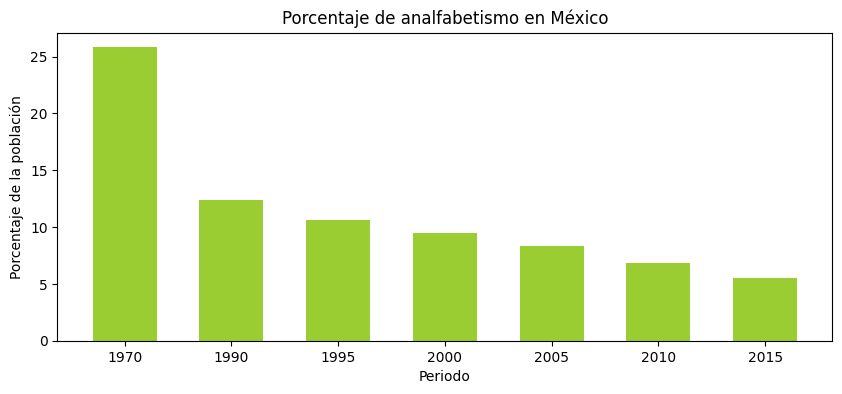

In [5]:
# Gráfico con estilo MATLAB
plt.figure(figsize=(10,4))
plt.title('Porcentaje de analfabetismo en México')
plt.bar(periodo, pob_analfabeta, facecolor = 'yellowgreen', width = 0.6)
plt.xlabel('Periodo')
plt.ylabel('Porcentaje de la población')
plt.show()

El siguiente gráfico consiste en el porcentaje de población analfabeta dividida por sexo.

In [6]:
# Porcentaje de analfabetas mujeres
url = 'https://www.inegi.org.mx/app/api/indicadores/desarrolladores/jsonxml/INDICATOR/3108001003/es/0700/false/BISE/2.0/2df7d990-4bbc-c1bd-f33e-2da2413413df?type=json'
respuesta = requests.get(url)
if respuesta.status_code == 200:
    contenido = json.loads(respuesta.content)
    # Cargar el contenido a la variable 'datos'
    datos = contenido['Series'][0]['OBSERVATIONS']
    pob_analfabeta_muj = []
    periodo = []
    for dato in datos:
        pob_analfabeta_muj.append(round(float(dato['OBS_VALUE']),2))
        periodo.append(str(dato['TIME_PERIOD']))
    
print('Lista del Porcentaje de analfabetas mujeres en México: \n', pob_analfabeta_muj)
print('Periodo: \n', periodo)

Lista del Porcentaje de analfabetas mujeres en México: 
 [29.63, 15.01, 12.66, 11.31, 9.77, 8.08, 6.45]
Periodo: 
 ['1970', '1990', '1995', '2000', '2005', '2010', '2015']


In [7]:
# Porcentaje de analfabetas hombres
url = 'https://www.inegi.org.mx/app/api/indicadores/desarrolladores/jsonxml/INDICATOR/3108001002/es/0700/false/BISE/2.0/2df7d990-4bbc-c1bd-f33e-2da2413413df?type=json'
respuesta = requests.get(url)
if respuesta.status_code == 200:
    contenido = json.loads(respuesta.content)
    # Cargar el contenido a la variable 'datos'
    datos = contenido['Series'][0]['OBSERVATIONS']
    pob_analfabeta_hom = []
    periodo = []
    for dato in datos:
        pob_analfabeta_hom.append(round(float(dato['OBS_VALUE']),2))
        periodo.append(str(dato['TIME_PERIOD']))
    
print('Lista del Porcentaje de analfabetas hombres en México: \n', pob_analfabeta_hom)
print('Periodo: \n', periodo)

Lista del Porcentaje de analfabetas hombres en México: 
 [21.82, 9.63, 8.42, 7.43, 6.8, 5.57, 4.41]
Periodo: 
 ['1970', '1990', '1995', '2000', '2005', '2010', '2015']


In [8]:
# DataFrame del analfabetismo en Méxicos
df_analfabetismo = pd.DataFrame()
df_analfabetismo['periodo'] = periodo
df_analfabetismo['porcentaje_mujeres'] = pob_analfabeta_muj
df_analfabetismo['porcentaje_hombres'] = pob_analfabeta_hom

df_analfabetismo

,periodo,porcentaje_mujeres,porcentaje_hombres
0,1970,29.63,21.82
1,1990,15.01,9.63
2,1995,12.66,8.42
3,2000,11.31,7.43
4,2005,9.77,6.80
5,2010,8.08,5.57
6,2015,6.45,4.41


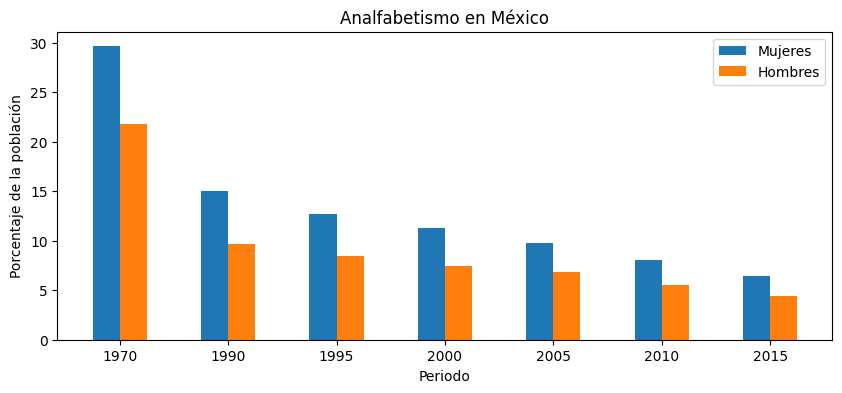

In [9]:
 # Definiendo posiciones auxiliares de los ejes
x_vals = np.arange(len(periodo[:]))
ancho = 0.25

 # Estilo MATLAB
plt.figure(figsize=(10,4))

plt.bar(x_vals - ancho/2, df_analfabetismo['porcentaje_mujeres'], width= ancho, label='Mujeres')
plt.bar(x_vals + ancho/2, df_analfabetismo['porcentaje_hombres'], width=ancho, label='Hombres')

plt.xticks(x_vals, periodo)
plt.title('Analfabetismo en México')
plt.xlabel('Periodo')
plt.ylabel('Porcentaje de la población')
plt.legend()

plt.show()

### Porcentaje de la población analfabeta de 15 años y más por estado

Cargamos el DataFrame con la clave de la entidad federativa y su abreviación

In [10]:
df_estados = pd.read_csv('datos/Catalogo_entidades.csv')[:32]
df_estados.head(8)

,CLAVE_ENTIDAD,ENTIDAD_FEDERATIVA,ABREVIATURA
0,1,AGUASCALIENTES,AS
1,2,BAJA CALIFORNIA,BC
2,3,BAJA CALIFORNIA SUR,BS
3,4,CAMPECHE,CC
4,5,COAHUILA DE ZARAGOZA,CL
5,6,COLIMA,CM
6,7,CHIAPAS,CS
7,8,CHIHUAHUA,CH


In [11]:
lista_porcentajes = []
#3108001001
for numero in df_estados['CLAVE_ENTIDAD']:
    if numero < 10:
        idnum = '0700000'+str(numero)
    else:
        idnum = '070000'+str(numero)
    #3108001001    
    #url = 'https://www.inegi.org.mx/app/api/indicadores/desarrolladores/jsonxml/INDICATOR/3108001001/es/' + idnum + '/true/BISE/2.0/2df7d990-4bbc-c1bd-f33e-2da2413413df?type=json'
    #1002000041
    url = 'https://www.inegi.org.mx/app/api/indicadores/desarrolladores/jsonxml/INDICATOR/1002000041/es/' + idnum + '/true/BISE/2.0/2df7d990-4bbc-c1bd-f33e-2da2413413df?type=json'
    response = requests.get(url)
    if response.status_code == 200:
        content = json.loads(response.content)
        lista_porcentajes.append(round(100 - float(content['Series'][0]['OBSERVATIONS'][0]['OBS_VALUE']),4))
    
df_estados['PORCENTAJES'] = lista_porcentajes
df_estados.head(30)

,CLAVE_ENTIDAD,ENTIDAD_FEDERATIVA,ABREVIATURA,PORCENTAJES
0,1,AGUASCALIENTES,AS,2.2598
1,2,BAJA CALIFORNIA,BC,2.2514
2,3,BAJA CALIFORNIA SUR,BS,2.5765
3,4,CAMPECHE,CC,5.9956
4,5,COAHUILA DE ZARAGOZA,CL,2.0071
5,6,COLIMA,CM,3.5033
6,7,CHIAPAS,CS,13.7839
7,8,CHIHUAHUA,CH,2.9038
8,9,CIUDAD DE MÉXICO,DF,1.8474
9,10,DURANGO,DG,2.9401


<Axes: xlabel='PORCENTAJES', ylabel='ENTIDAD_FEDERATIVA'>

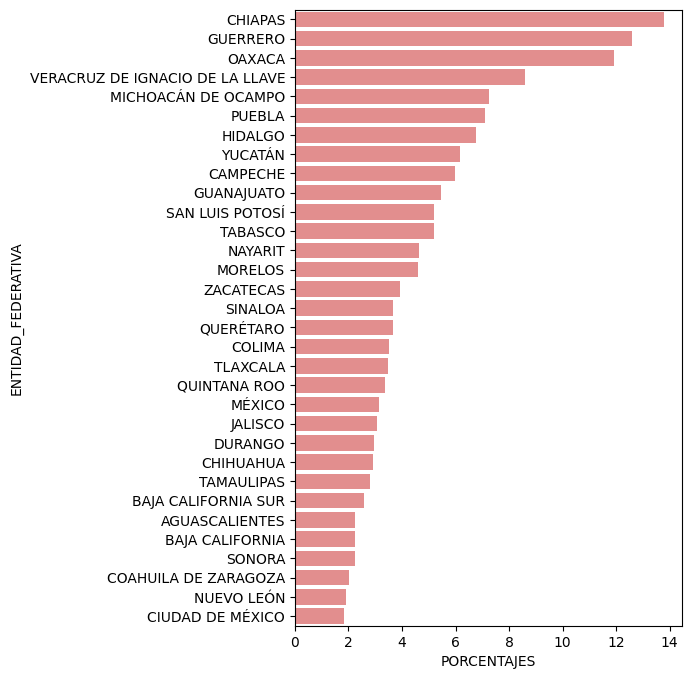

In [12]:
# Gráfica estilo seaborn
fig, ax = plt.subplots(figsize=(5,8))
sns.barplot(data = df_estados, y = 'ENTIDAD_FEDERATIVA', x = 'PORCENTAJES', color = 'lightcoral', order = df_estados.sort_values('PORCENTAJES', ascending = False)['ENTIDAD_FEDERATIVA'])

In [13]:
estados_geo = ('datos/mexico_estados_geo.json')
map = folium.Map(location=[24,-102], zoom_start=5,min_zoom=5,max_zoom=6)

titulo="Analfabetismo en México"

folium.Choropleth(geo_data=estados_geo, data=df_estados, 
             columns=['ABREVIATURA', 'PORCENTAJES'],
             key_on='feature.id',
             fill_color='Reds', fill_opacity=0.9, line_opacity=0.9,
             legend_name=titulo).add_to(map)
map

### Analfabetismo en Yucatán

Cargamos el DataFrame de los municipios [[2]](https://ide.sedatu.gob.mx/layers/geonode:a__31_MUN_INEGI_2020/metadata_detail)

In [19]:
df_municipios = pd.read_csv('datos/Catalogo_municipios.csv')
df_municipios


,FID,fid.1,CVEGEO,CVE_ENT,CVE_MUN,NOMGEO,Cve_MunC,ID_Geo_N,Nom_Ent
0,a__31_MUN_INEGI_2020.1,1,31001,31,1,Abalá,31001,1,Yucatán
1,a__31_MUN_INEGI_2020.2,2,31002,31,2,Acanceh,31002,2,Yucatán
2,a__31_MUN_INEGI_2020.3,3,31003,31,3,Akil,31003,3,Yucatán
3,a__31_MUN_INEGI_2020.4,4,31004,31,4,Baca,31004,4,Yucatán
4,a__31_MUN_INEGI_2020.5,5,31005,31,5,Bokobá,31005,5,Yucatán
...,...,...,...,...,...,...,...,...,...
101,a__31_MUN_INEGI_2020.102,102,31097,31,97,Tunkás,31097,102,Yucatán
102,a__31_MUN_INEGI_2020.103,103,31098,31,98,Tzucacab,31098,103,Yucatán
103,a__31_MUN_INEGI_2020.104,104,31099,31,99,Uayma,31099,104,Yucatán
104,a__31_MUN_INEGI_2020.105,105,31105,31,105,Yaxkukul,31105,105,Yucatán


In [20]:
df_municipios = pd.read_csv('datos/Catalogo_municipios.csv')#[:106]
df_municipios.tail()

,FID,fid.1,CVEGEO,CVE_ENT,CVE_MUN,NOMGEO,Cve_MunC,ID_Geo_N,Nom_Ent
101,a__31_MUN_INEGI_2020.102,102,31097,31,97,Tunkás,31097,102,Yucatán
102,a__31_MUN_INEGI_2020.103,103,31098,31,98,Tzucacab,31098,103,Yucatán
103,a__31_MUN_INEGI_2020.104,104,31099,31,99,Uayma,31099,104,Yucatán
104,a__31_MUN_INEGI_2020.105,105,31105,31,105,Yaxkukul,31105,105,Yucatán
105,a__31_MUN_INEGI_2020.106,106,31106,31,106,Yobaín,31106,106,Yucatán


Obtenemos la información del INEGI

In [25]:
# Por municipio
lista_porcentajes = []
#070000310001
for numero in df_municipios['CVE_MUN']:
    if numero < 10:
        idnum = '07000031000'+ str(numero)
    elif numero < 100 :
        idnum = '0700003100'+ str(numero)
    else:
        idnum = '070000310'+ str(numero)
        
    url = f'https://www.inegi.org.mx/app/api/indicadores/desarrolladores/jsonxml/INDICATOR/1002000041/es/{idnum}/true/BISE/2.0/2df7d990-4bbc-c1bd-f33e-2da2413413df?type=json'
    response = requests.get(url)
    if response.status_code == 200:
        content = json.loads(response.content)
        lista_porcentajes.append(round(100 - float(content['Series'][0]['OBSERVATIONS'][0]['OBS_VALUE']),4))
    
df_municipios['PORCENTAJES'] = lista_porcentajes
df_municipios.head()


ConnectTimeout: HTTPSConnectionPool(host='www.inegi.org.mx', port=443): Max retries exceeded with url: /app/api/indicadores/desarrolladores/jsonxml/INDICATOR/1002000041/es/070000310005/true/BISE/2.0/2df7d990-4bbc-c1bd-f33e-2da2413413df?type=json (Caused by ConnectTimeoutError(<urllib3.connection.HTTPSConnection object at 0x7d2eac4724a0>, 'Connection to www.inegi.org.mx timed out. (connect timeout=None)'))

In [ ]:
lista_porcentajes

[14.5551, 7.5184, 12.2305, 4.7688, 10.2776, 10.9418, 13.9408]

In [ ]:
municipios_geo = ('datos/yucatan_municipios_geo.json')
map = folium.Map(location = [20.50, -88.80], zoom_start = 8, max_zoom=13, min_zoom=7)

titulo="Analfabetismo en Yucatán"

folium.Choropleth(geo_data=municipios_geo, data=df_municipios, 
             columns=['FID', 'PORCENTAJES'],
             key_on='feature.id',
             fill_color='Reds', fill_opacity=0.9, line_opacity=0.9,
             legend_name=titulo).add_to(map)
map

KeyError: 'PORCENTAJES'

In [ ]:
# Gráfica estilo seaborn
fig, ax = plt.subplots(figsize=(5,25))
sns.barplot(data = df_municipios, y = 'NOMGEO', x = 'PORCENTAJES', color = 'lightcoral', order = df_municipios.sort_values('PORCENTAJES', ascending = False)['NOMGEO'])

### Gastos en educación como porcentaje del PIB

Serie histórica de gastos en educación

In [ ]:
# Gastos en educación, registro histórico
url = 'https://www.inegi.org.mx/app/api/indicadores/desarrolladores/jsonxml/INDICATOR/6207067825/es/0700/false/BISE/2.0/2df7d990-4bbc-c1bd-f33e-2da2413413df?type=json'
respuesta = requests.get(url)
if respuesta.status_code == 200:
    contenido = json.loads(respuesta.content)
    # Cargar el contenido a la variable 'datos'
    datos = contenido['Series'][0]['OBSERVATIONS']
    gastos_educacion = []
    periodo = []
    for dato in datos:
        gastos_educacion.append(round(float(dato['OBS_VALUE']),4))
        periodo.append(str(dato['TIME_PERIOD']))
    
print('Lista de gastos realizados en educación: \n', gastos_educacion)
print('Periodo: \n', periodo)

In [ ]:
# Base de datos

df_gasto_educ = pd.DataFrame()
df_gasto_educ['PERIODO'] = periodo
df_gasto_educ['PORCENTAJE'] = gastos_educacion

fig, ax = plt.subplots(figsize = (10,4))
sns.lineplot(data = df_gasto_educ, x = 'PERIODO', y = 'PORCENTAJE', linewidth=2.5, color= 'green')
plt.xticks(rotation = 90)
plt.show()
